In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

%matplotlib inline
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Some Worked Examples from the Chapter 04

In [2]:
# 4.7
d = pd.read_csv('../datasets/Howell1.csv', sep=';', header=0)

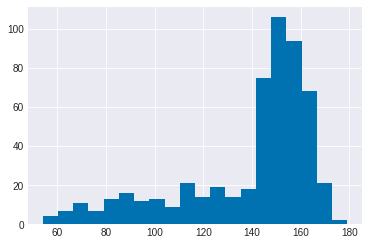

In [3]:
plt.hist(d.height, bins=20)
plt.show()

In [4]:
# 4.10
d2 = d[d.age >= 18.0]

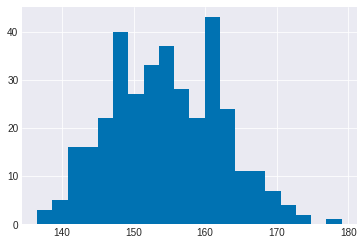

In [5]:
plt.hist(d2.height, bins=20)
plt.show()

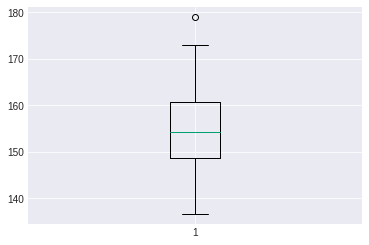

In [6]:
plt.boxplot(d2.height)
plt.show()

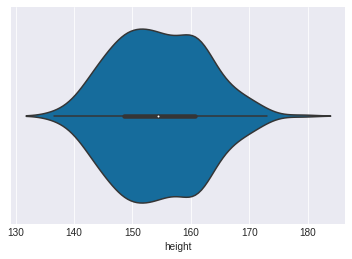

In [7]:
sns.violinplot(d2.height)
plt.show()

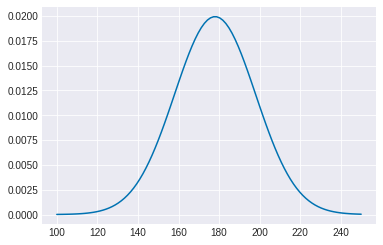

In [8]:
# 4.11
x = np.linspace(100, 250, 100)
plt.plot(x, stats.norm.pdf(x, 178, 20))
plt.show()

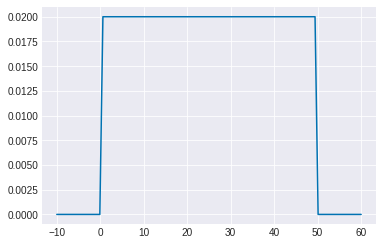

In [9]:
# 4.12
x = np.linspace(-10, 60, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 50))
plt.show()

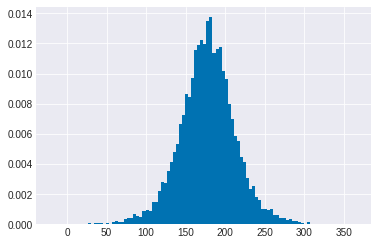

In [10]:
# 4.13
sample_size = int(1e4)
sample_mu = np.random.normal(178,20,sample_size)
sample_sigma = np.random.uniform(0,50, sample_size)
prior_h = np.random.normal(sample_mu, sample_sigma)
plt.hist(prior_h, bins=100, density=True)
plt.show()

In [11]:
np.median(prior_h)

177.90603548228657

In [12]:
# 4.14
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

mu_list = np.linspace(140, 160, 200)
sigma_list = np.linspace(4, 9, 200)
post = expand_grid({
    'mu': mu_list,
    'sigma': sigma_list
})

def compute_log_likelihood(r):
    return sum(stats.norm.logpdf(d2.height, r.mu, r.sigma))

post['LL'] = post.apply(compute_log_likelihood, axis=1)
post['prod'] = post.LL + stats.norm.logpdf(post.mu, 178, 20) + stats.uniform.logpdf(post.sigma, 0, 50)
post['prob'] = np.exp(post['prod'] - post['prod'].max())

In [13]:
post.head()

,mu,sigma,LL,prod,prob
0,140.0,4.000000,-3812.775755,-3822.407448,0.0
1,140.0,4.025126,-3777.627007,-3787.258701,0.0
2,140.0,4.050251,-3743.157537,-3752.789231,0.0
3,140.0,4.075377,-3709.350479,-3718.982173,0.0
4,140.0,4.100503,-3676.189482,-3685.821176,0.0


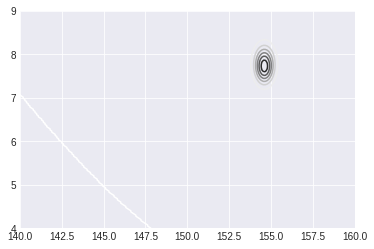

In [14]:
# 4.15
piv = post.pivot('sigma','mu','prob')
plt.contour(piv.columns.values, piv.index.values,   piv.values)
plt.show()

In [15]:
piv.head()

mu,140.0,140.10050251256283,140.20100502512562,140.30150753768845,140.40201005025125,140.50251256281408,140.60301507537687,140.7035175879397,140.80402010050253,140.90452261306532,...,159.09547738693468,159.1959798994975,159.2964824120603,159.39698492462313,159.49748743718592,159.59798994974875,159.69849246231155,159.79899497487438,159.8994974874372,160.0
sigma,,,,,,,,,,,,,,,,,,,,,
4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.147214e-205,4.941722e-210,1.704486e-214,4.707501e-219,1.041043e-223,1.843439e-228,2.613789e-233,2.967520e-238,2.697730e-243,1.963744e-248
4.025126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.232863e-202,3.531046e-206,1.384137e-210,4.356499e-215,1.100978e-219,2.234099e-224,3.640063e-229,4.762094e-234,5.002300e-239,4.219142e-244
4.050251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.772935e-198,2.082684e-202,9.256118e-207,3.312042e-211,9.541668e-216,2.213167e-220,4.133001e-225,6.214101e-230,7.522333e-235,7.331422e-240
4.075377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.636244e-194,1.018965e-198,5.122583e-203,2.078918e-207,6.810894e-212,1.801314e-216,3.845858e-221,6.628506e-226,9.222666e-231,1.035895e-235
4.100503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.927168e-191,4.154952e-195,2.357432e-199,1.082597e-203,4.023913e-208,1.210556e-212,2.947647e-217,5.809256e-222,9.266589e-227,1.196392e-231


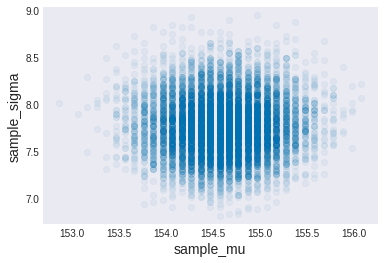

In [16]:
# 4.17 & 4.18
sample_rows = post.sample(int(1e4), replace=True, weights='prob')
sample_mu = sample_rows.mu
sample_sigma = sample_rows.sigma

plt.scatter(sample_mu, sample_sigma, marker='o', alpha=0.05)
plt.axis('equal')
plt.grid(False)
plt.xlabel('sample_mu', fontsize=14)
plt.ylabel('sample_sigma', fontsize=14)
plt.show()

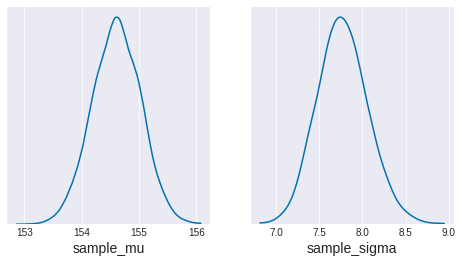

In [17]:
# 4.19
_, ax = plt.subplots(1,2, figsize=(8,4))
pm.kdeplot(sample_mu, ax=ax[0])
ax[0].set_xlabel('sample_mu', fontsize=14)
ax[0].set_yticks([])
pm.kdeplot(sample_sigma, ax=ax[1])
ax[1].set_xlabel('sample_sigma', fontsize=14)
ax[1].set_yticks([]);

In [18]:
# 4.20
pm.hpd(sample_mu, 0.11), pm.hpd(sample_sigma, 0.11)

(array([153.86934673, 155.1758794 ]), array([7.31658291, 8.22110553]))

In [19]:
# 4.25
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    
    trace_4_1 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:01<00:00, 3244.45draws/s]
The acceptance probability does not match the target. It is 0.8830447638830059, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8979643398161453, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.61,0.41,0.01,153.95,155.25,1889.52,1.0
sigma,7.77,0.30,0.01,7.28,8.25,2111.35,1.0


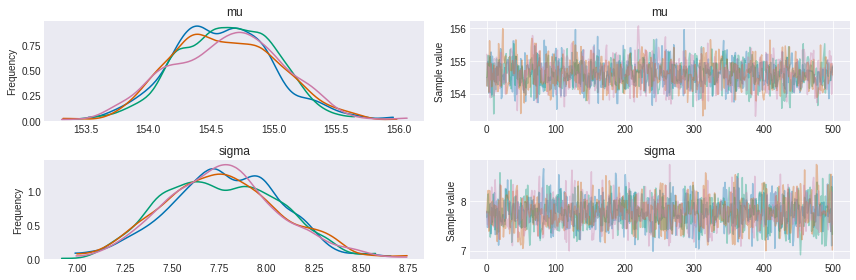

In [20]:
# 4.27
pm.traceplot(trace_4_1);
pm.summary(trace_4_1, alpha=.11).round(2)

In [21]:
# 4.29
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    
    trace_4_2 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:01<00:00, 3927.08draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,177.86,0.10,0.00,177.71,178.02,2085.37,1.0
sigma,24.62,0.89,0.02,23.21,26.05,2180.11,1.0


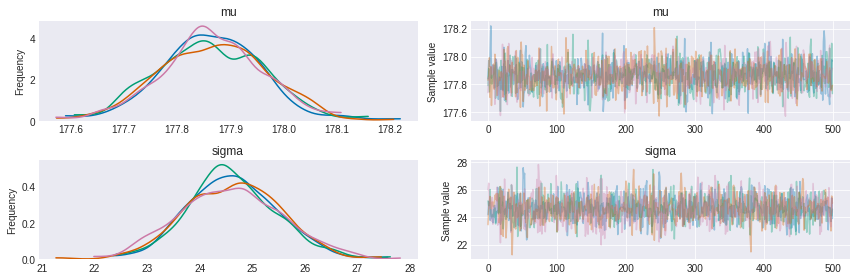

In [22]:
# 4.29
pm.traceplot(trace_4_2);
pm.summary(trace_4_2, alpha=.11).round(2)

In [23]:
# 4.30
trace_df_4_1 = pm.trace_to_dataframe(trace_4_1)
trace_df_4_1.cov()

,mu,sigma
mu,0.170977,0.004452
sigma,0.004452,0.091496


In [24]:
# 4.38 & 4.39
with pm.Model() as m_4_3:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    beta = pm.Normal('beta', mu=0, sd=10)
    alpha = pm.Normal('alpha', mu=156, sd=100)
    mu = alpha + beta * d2.weight
    mu = pm.Deterministic('mu', mu)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    
    trace_4_3 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1142.14draws/s]
The acceptance probability does not match the target. It is 0.9156904743841507, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


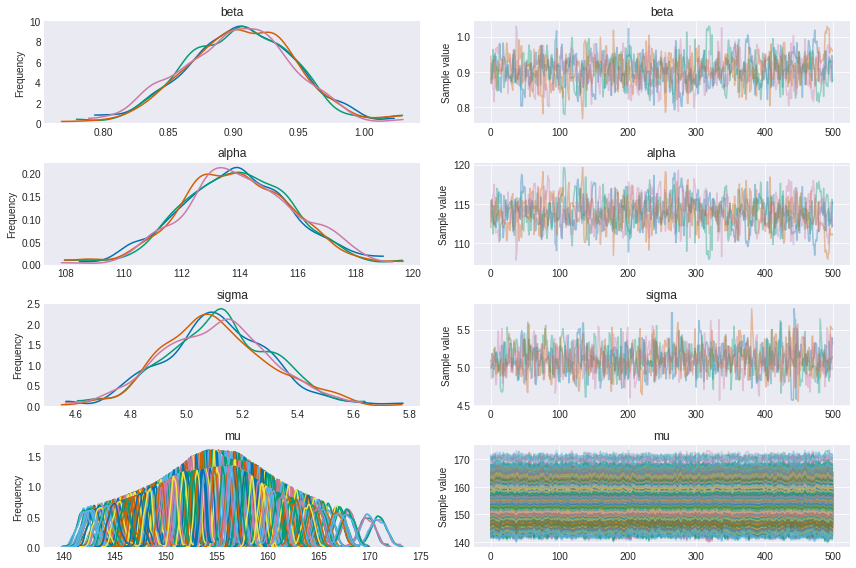

In [25]:
pm.traceplot(trace_4_3);

In [26]:
# 4.41
trace_df_4_3 = pm.trace_to_dataframe(trace_4_3)
trace_df_4_3[['alpha', 'beta', 'sigma']].corr().round(2)

,alpha,beta,sigma
alpha,1.00,-0.99,0.02
beta,-0.99,1.00,-0.02
sigma,0.02,-0.02,1.00


In [27]:
# 4.42
d2['weight_c'] = d2.weight - d2.weight.mean()

/home/jbrusch/.virtualenvs/jupyter-lab/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# 4.43
with pm.Model() as m_4_4:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    beta = pm.Normal('beta', mu=0, sd=10)
    alpha = pm.Normal('alpha', mu=156, sd=100)
    mu = alpha + beta * d2.weight_c
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    
    trace_4_4 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:01<00:00, 3024.98draws/s]


In [29]:
# 4.44
pm.summary(trace_4_4, alpha=.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
beta,0.90,0.04,0.00,0.83,0.97,2712.09,1.0
alpha,154.61,0.27,0.01,154.16,155.03,2303.86,1.0
sigma,5.10,0.19,0.00,4.79,5.39,2740.61,1.0


/home/jbrusch/.virtualenvs/jupyter-lab/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -2,541, ||grad|| = 7,903.1: 100%|██████████| 31/31 [00:00<00:00, 2975.23it/s]  


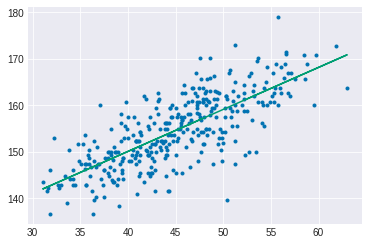

In [30]:
# 4.45
plt.plot(d2.weight, d2.height, '.');
map_4_3 = pm.find_MAP(model=m_4_3)
plt.plot(d2.weight, map_4_3['alpha'] + map_4_3['beta'] * d2.weight);

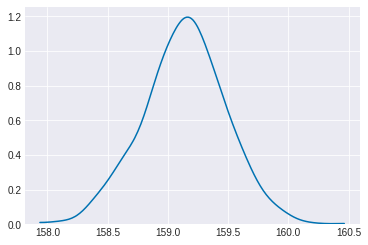

In [31]:
# 4.50 & 4.51
mu_at_50 = trace_4_3['alpha'] + trace_4_3['beta'] * 50
pm.kdeplot(mu_at_50);

In [28]:
# 4.52
pm.hpd(mu_at_50, alpha=.11)

array([158.59100007, 159.69541316])

In [41]:
trace_df_4_3.head()

,beta,alpha,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__342,mu__343,mu__344,mu__345,mu__346,mu__347,mu__348,mu__349,mu__350,mu__351
0,0.881686,115.414747,4.990855,157.581926,147.583780,143.509536,162.181073,151.807997,170.954445,149.133493,...,154.232547,157.631916,150.158303,151.608034,151.408071,156.882055,145.609146,161.406216,163.080906,161.731156
1,0.881686,115.414747,4.990855,157.581926,147.583780,143.509536,162.181073,151.807997,170.954445,149.133493,...,154.232547,157.631916,150.158303,151.608034,151.408071,156.882055,145.609146,161.406216,163.080906,161.731156
2,0.880230,114.639471,5.038511,156.736981,146.755354,142.687842,161.328529,150.972592,170.087407,148.302507,...,153.393136,156.786889,149.325623,150.772959,150.573327,156.038267,144.783983,160.554953,162.226876,160.879356
3,0.932726,112.943620,5.055206,157.551820,146.974890,142.664792,162.417208,151.443643,171.698463,148.614315,...,154.008549,157.604705,149.698450,151.232105,151.020566,156.811435,144.885947,161.597496,163.369131,161.941246
4,0.932726,112.943620,5.055206,157.551820,146.974890,142.664792,162.417208,151.443643,171.698463,148.614315,...,154.008549,157.604705,149.698450,151.232105,151.020566,156.811435,144.885947,161.597496,163.369131,161.941246


In [39]:
def check_mus(r):
    for i in range(0,10):
        alpha = r.alpha
        beta = r.beta
        w = d2.weight.iloc[i]
        pred = alpha + beta * w
        print(f"alphamu_{i}: {pred}")

In [40]:
check_mus(trace_df_4_3.iloc[0])

mu_0: 157.58192558771657
mu_1: 147.58378011133
mu_2: 143.50953582970243
mu_3: 162.1810725068544
mu_4: 151.80799657510332
mu_5: 170.95444516238365
mu_6: 149.1334926601699
mu_7: 164.3306737842775
mu_8: 146.1590443809449
mu_9: 163.4558360550937


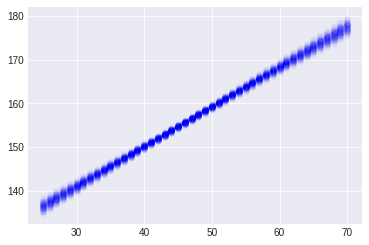

In [113]:
# 4.54 & 4.58
weight_seq = np.arange(25, 71)
samples = trace_df_4_3.sample(frac=1)
mu = np.zeros((len(weight_seq), len(samples)))
for i,w in enumerate(weight_seq):
    mu[i] = samples.alpha + samples.beta * w

#plot the first 100 lines of mu
plt.plot(weight_seq, mu[:,:100], marker='o', color='blue', alpha=.01);

In [114]:
# 4.56
mu_mean = np.apply_along_axis(np.mean, 1, mu)
mu_hpd = np.apply_along_axis(pm.stats.hpd, 1, mu)
print(mu_mean[:10])
print(mu_hpd[:10])

[136.51725113 137.42176676 138.32628238 139.230798   140.13531362
 141.03982924 141.94434486 142.84886049 143.75337611 144.65789173]
[[134.81037623 138.26219441]
 [135.8203979  139.12032763]
 [136.79675469 139.93979105]
 [137.80259965 140.79617226]
 [138.77472971 141.62135499]
 [139.75505792 142.44505988]
 [140.73860462 143.29022838]
 [141.69994394 144.10703955]
 [142.69935683 144.96457361]
 [143.67788411 145.7947837 ]]


In [115]:
mu_hpd[:,0]

array([134.81037623, 135.8203979 , 136.79675469, 137.80259965,
       138.77472971, 139.75505792, 140.73860462, 141.69994394,
       142.69935683, 143.67788411, 144.63244164, 145.56750706,
       146.60223182, 147.53446091, 148.49262008, 149.48196609,
       150.41869994, 151.27529225, 152.17560823, 153.12309015,
       154.0695838 , 154.93256577, 155.80757591, 156.74486855,
       157.59976464, 158.42854195, 159.22158448, 160.08018978,
       160.92540538, 161.77945569, 162.60590856, 163.45452823,
       164.28684863, 165.09609057, 165.92670349, 166.76726215,
       167.55869556, 168.43765891, 169.26725508, 169.9765799 ,
       170.80184134, 171.61502292, 172.43430406, 173.27762566,
       174.1479211 , 175.15221804])

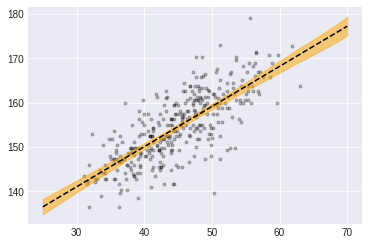

In [230]:
# 4.57
plt.scatter(d2.weight, d2.height, color='black', marker='.', alpha=0.25)
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='orange', alpha=0.5)
plt.plot(weight_seq, mu_mean, color='black', linestyle="--");

In [130]:
# 4.59
sim_height = pm.sample_posterior_predictive(trace_4_3, model=m_4_3, samples=1000)
sim_height['height'].shape

100%|██████████| 1000/1000 [00:00<00:00, 1951.28it/s]


Which leaves us with posterior predictive checks for all observed weight values. Which is also nice. But we want the simulated heights for our weight vector.

In [201]:
# 4.63
def _rand(r, xs):
    mu = r.alpha + r.beta * xs
    return np.random.normal(mu, r.sigma)
    
def sim(trace_df, xs, n=1000):
    post = trace_df[['alpha', 'beta', 'sigma']].sample(n=n)
    sim_height_series = post.apply(_rand, 1, xs=xs)
    return np.stack(sim_height_series.values)

sim_height = sim(trace_df_4_3, weight_seq, n=1000)

In [228]:
# 4.60
height_PI = np.apply_along_axis(pm.hpd, 0, sim_height, alpha=.11)
height_PI = np.transpose(height_PI)

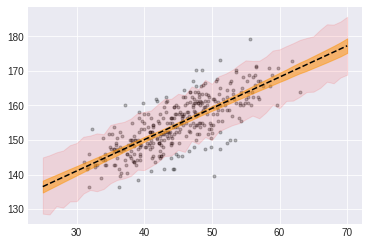

In [229]:
# 4.61
plt.scatter(d2.weight, d2.height, color='black', marker='.', alpha=0.25)
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='orange', alpha=0.5)
plt.fill_between(weight_seq, height_PI[:,0], height_PI[:,1], color='red', alpha=0.1)
plt.plot(weight_seq, mu_mean, color='black', linestyle="--");